In [ ]:
#LOGISTIC REGRESSION:-
#ALL THE LIBRARIES:-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/bank-additional-full_final (3).csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [ ]:
#NULL VALUE ANALYSIS:-
df.isnull().sum().sum()
#IF THERE IS NULL VALUES:-
col_list=df.columns
for col in col_list:
  if df[col].dtype=='object':
    df[col].fillna(df[col].mode()[0],inplace=True)
  else:
    df[col].fillna(df[col].mean(),inplace=True)

<ipython-input-3-2351105a99fa>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(),inplace=True)
<ipython-input-3-2351105a99fa>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

In [ ]:
#CHECK FOR DUPLICATE VALUES:-
df.duplicated().sum()
#drop duplicate values:-
df.drop_duplicates(inplace=True)

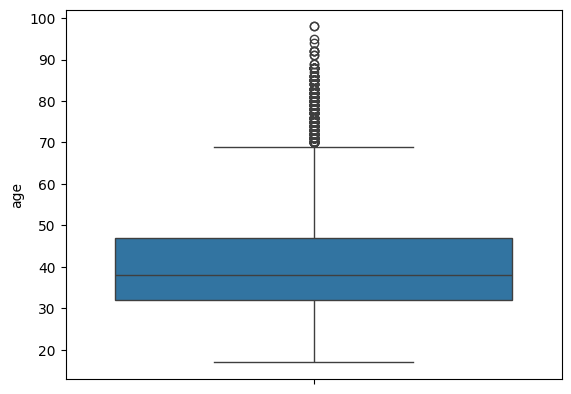

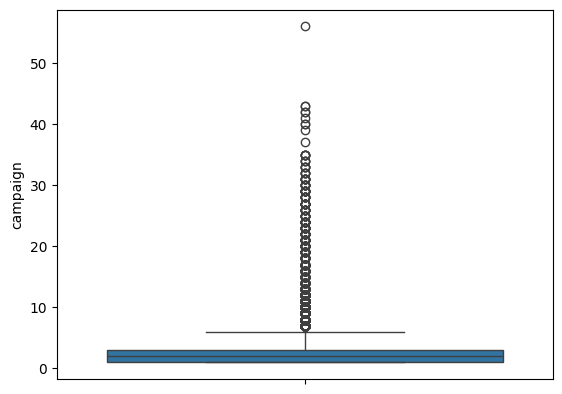

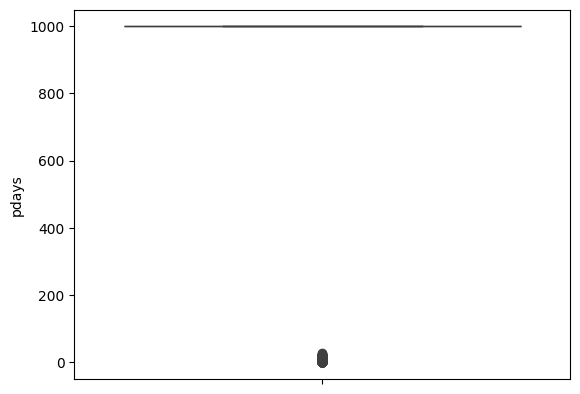

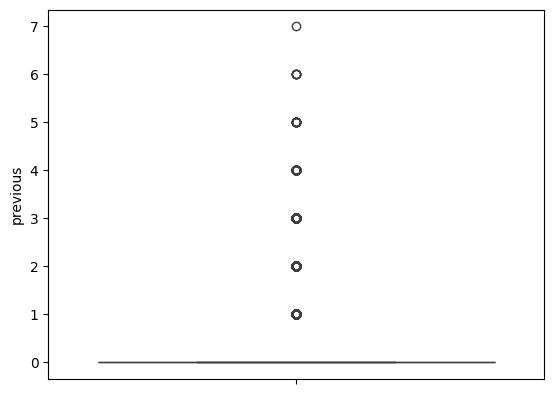

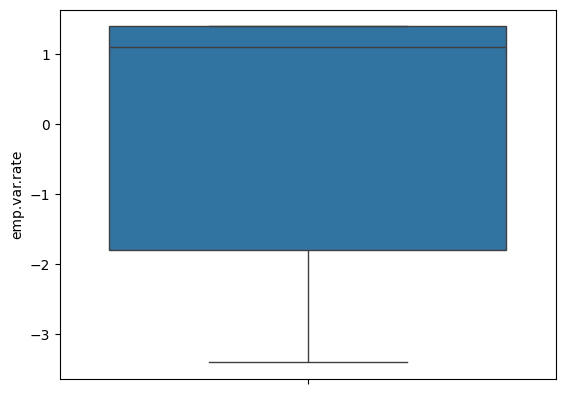

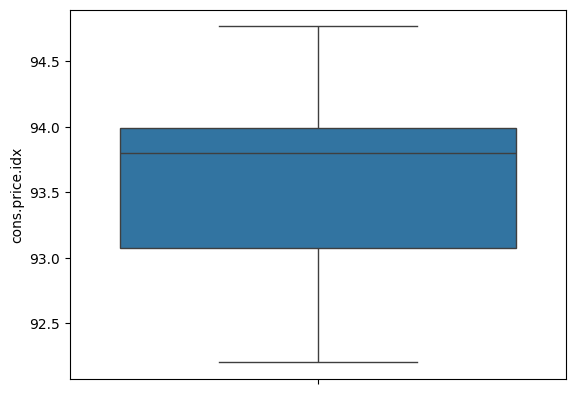

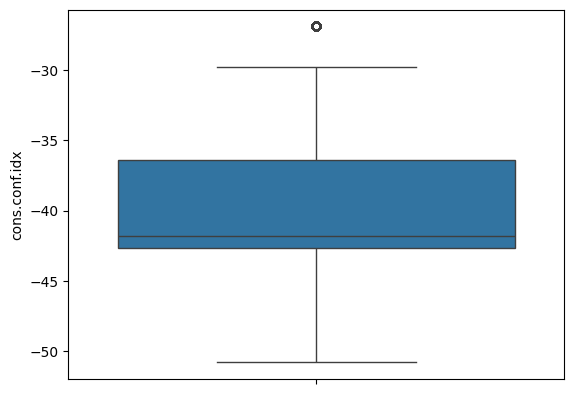

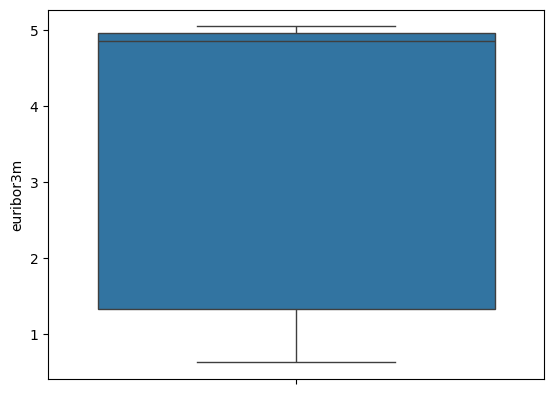

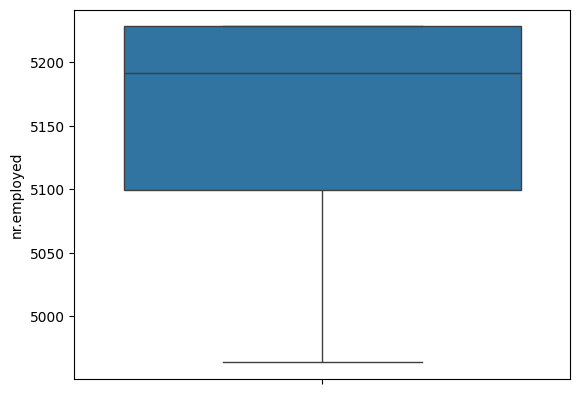

In [ ]:
#CHECK FOR OUTLIERS:-
for col in col_list:
  if df[col].dtype!='object':
    sns.boxplot(df[col])
    plt.show()

In [ ]:
#out_columns:-age ,campaign,cons.conf.idx
out_columns=['age','campaign','cons.conf.idx']
for col in out_columns:
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  iqr=q3-q1
  lower_limit=q1-1.5*iqr
  upper_limit=q3+1.5*iqr
  df=df[(df[col]<upper_limit)&(df[col]>lower_limit)]




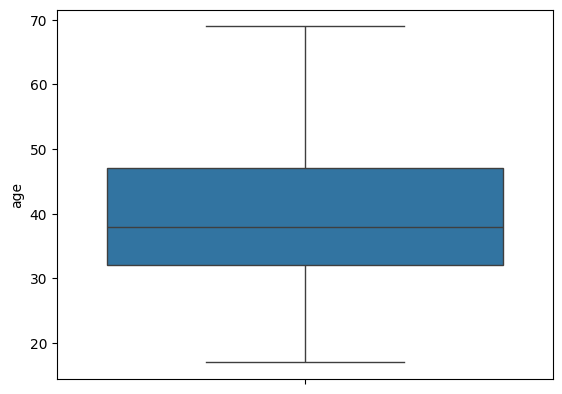

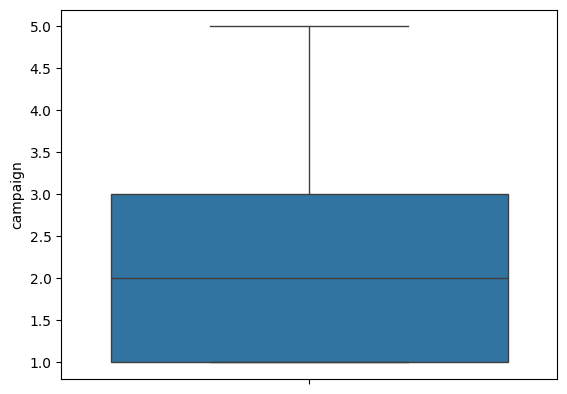

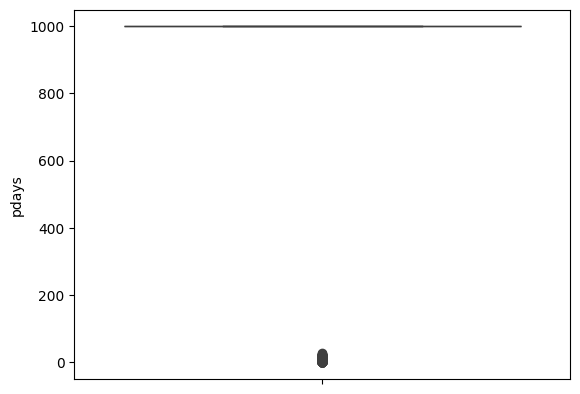

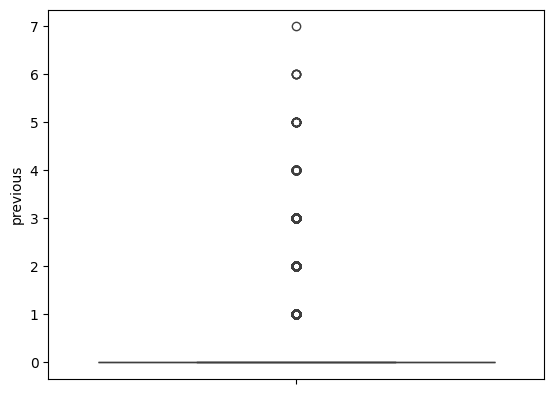

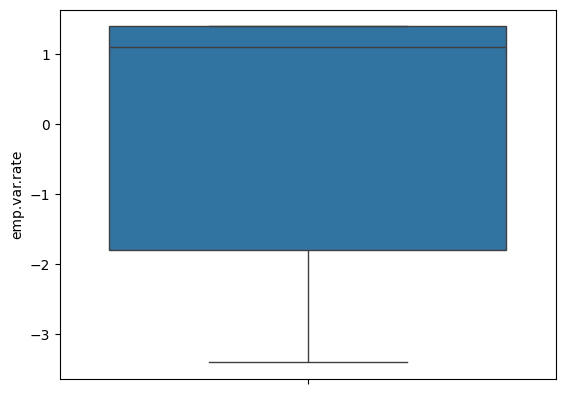

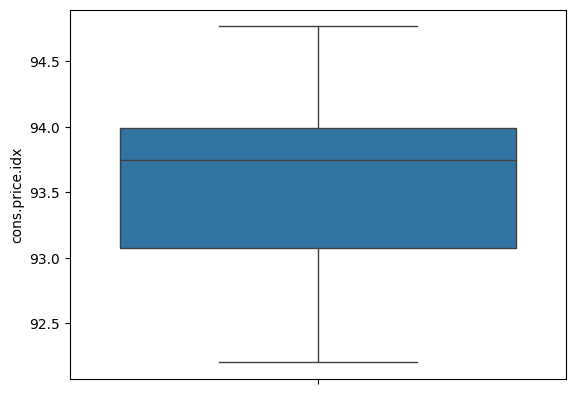

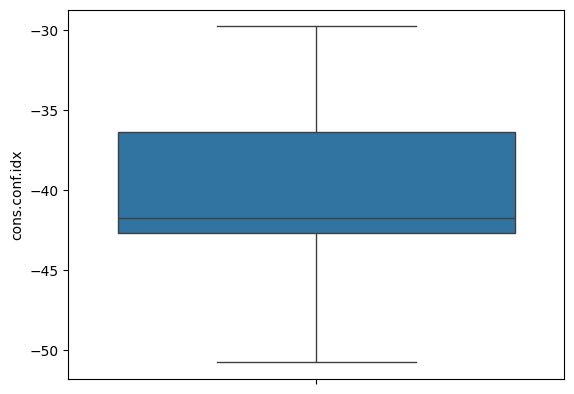

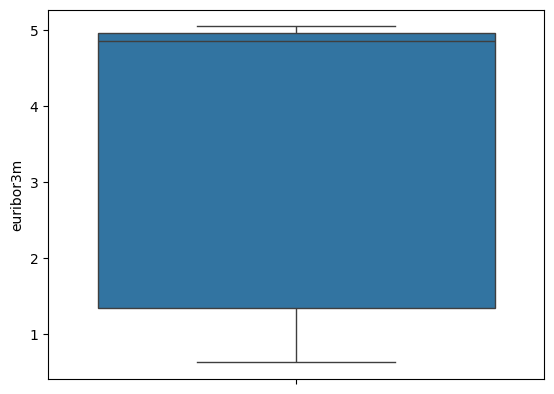

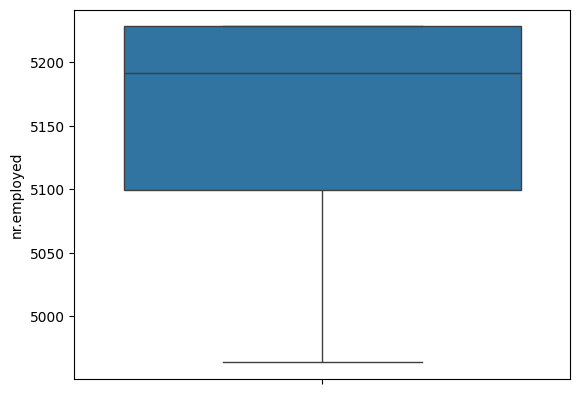

In [ ]:
#CHECK FOR OUTLIERS:-
for col in col_list:
  if df[col].dtype!='object':
    sns.boxplot(df[col])
    plt.show()

# NO OUTLIERS.

In [ ]:
df.info() #41k --> 36k rows

<class 'pandas.core.frame.DataFrame'>
Index: 35215 entries, 0 to 41186
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             35215 non-null  int64  
 1   job             35215 non-null  object 
 2   marital         35215 non-null  object 
 3   education       35215 non-null  object 
 4   default         35215 non-null  object 
 5   housing         35215 non-null  object 
 6   loan            35215 non-null  object 
 7   contact         35215 non-null  object 
 8   month           35215 non-null  object 
 9   day_of_week     35215 non-null  object 
 10  campaign        35215 non-null  int64  
 11  pdays           35215 non-null  int64  
 12  previous        35215 non-null  int64  
 13  poutcome        35215 non-null  object 
 14  emp.var.rate    35215 non-null  float64
 15  cons.price.idx  35215 non-null  float64
 16  cons.conf.idx   35215 non-null  float64
 17  euribor3m       35215 non-null  floa

In [ ]:
#label encoding:-
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in col_list:
  if df[col].dtype=='object':
    df[col]=le.fit_transform(df[col])


In [ ]:
#CHECK THE DEPENDENCY OF EVERY COLUMN USING VIF.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df=pd.DataFrame()


""


In [ ]:
x=df.drop('y',axis=1)#COLLECTION OF INDEPENDENT COLUMNS
y=df['y']#COLLECTION OF DEPENDENT COLUMNS

In [ ]:
vif_df['FEATURES']=x.columns
vif_df

,FEATURES
0,age
1,job
2,marital
3,education
4,default
5,housing
6,loan
7,contact
8,month
9,day_of_week


In [ ]:
vif_values=[]
for i in range(len(x.columns)):
  val=variance_inflation_factor(x.values,i)
  vif_values.append(val)
vif_df['MULTICOLINARITY']=vif_values
vif_df

,FEATURES,MULTICOLINARITY
0,age,21.892634
1,job,2.117264
2,marital,5.658032
3,education,4.534414
4,default,1.411969
5,housing,2.202187
6,loan,1.217004
7,contact,2.942938
8,month,6.580097
9,day_of_week,3.086773


In [ ]:
#NOW WE HAVE TO DELETE THE HIGHEST VIF VALUE COLUM
x.drop('nr.employed',axis=1,inplace=True)

In [ ]:
vif_df=pd.DataFrame()
vif_values=[]
vif_df['FEATURES']=x.columns
for i in range(len(x.columns)):
  val=variance_inflation_factor(x.values,i)
  vif_values.append(val)
vif_df['MULTICOLINARITY']=vif_values
vif_df

,FEATURES,MULTICOLINARITY
0,age,21.884879
1,job,2.117141
2,marital,5.656833
3,education,4.532337
4,default,1.408671
5,housing,2.201708
6,loan,1.216924
7,contact,2.471187
8,month,5.680592
9,day_of_week,3.086170


In [ ]:
#NOW WE HAVE TO DELETE THE HIGHEST VIF VALUE COLUM
x.drop('cons.price.idx',axis=1,inplace=True)

In [ ]:
vif_df=pd.DataFrame()
vif_values=[]
vif_df['FEATURES']=x.columns
for i in range(len(x.columns)):
  val=variance_inflation_factor(x.values,i)
  vif_values.append(val)
vif_df['MULTICOLINARITY']=vif_values
vif_df

,FEATURES,MULTICOLINARITY
0,age,20.700746
1,job,2.111644
2,marital,5.503078
3,education,4.477352
4,default,1.408654
5,housing,2.200322
6,loan,1.216454
7,contact,2.372697
8,month,5.640483
9,day_of_week,3.067928


In [ ]:
#NOW WE HAVE TO DELETE THE HIGHEST VIF VALUE COLUM
x.drop('pdays',axis=1,inplace=True)

In [ ]:
vif_df=pd.DataFrame()
vif_values=[]
vif_df['FEATURES']=x.columns
for i in range(len(x.columns)):
  val=variance_inflation_factor(x.values,i)
  vif_values.append(val)
vif_df['MULTICOLINARITY']=vif_values
vif_df

,FEATURES,MULTICOLINARITY
0,age,19.822837
1,job,2.108402
2,marital,5.384918
3,education,4.427222
4,default,1.408613
5,housing,2.197265
6,loan,1.216254
7,contact,2.301283
8,month,5.596489
9,day_of_week,3.054371


In [ ]:
#NOW WE HAVE TO DELETE THE HIGHEST VIF VALUE COLUM
x.drop('euribor3m',axis=1,inplace=True)

In [ ]:
vif_df=pd.DataFrame()
vif_values=[]
vif_df['FEATURES']=x.columns
for i in range(len(x.columns)):
  val=variance_inflation_factor(x.values,i)
  vif_values.append(val)
vif_df['MULTICOLINARITY']=vif_values
vif_df

,FEATURES,MULTICOLINARITY
0,age,16.931715
1,job,2.101928
2,marital,5.194556
3,education,4.279083
4,default,1.408306
5,housing,2.189193
6,loan,1.215865
7,contact,2.289745
8,month,5.219458
9,day_of_week,3.013114


In [ ]:
#NOW WE HAVE TO DELETE THE HIGHEST VIF VALUE COLUM
x.drop('cons.conf.idx',axis=1,inplace=True)

In [ ]:
vif_df=pd.DataFrame()
vif_values=[]
vif_df['FEATURES']=x.columns
for i in range(len(x.columns)):
  val=variance_inflation_factor(x.values,i)
  vif_values.append(val)
vif_df['MULTICOLINARITY']=vif_values
vif_df

,FEATURES,MULTICOLINARITY
0,age,10.562723
1,job,2.092617
2,marital,4.316859
3,education,4.182203
4,default,1.407449
5,housing,2.154515
6,loan,1.212127
7,contact,2.267938
8,month,4.831651
9,day_of_week,2.944676


In [ ]:
#NOW WE HAVE TO DELETE THE HIGHEST VIF VALUE COLUM
x.drop('age',axis=1,inplace=True)

In [ ]:
vif_df=pd.DataFrame()
vif_values=[]
vif_df['FEATURES']=x.columns
for i in range(len(x.columns)):
  val=variance_inflation_factor(x.values,i)
  vif_values.append(val)
vif_df['MULTICOLINARITY']=vif_values
vif_df

,FEATURES,MULTICOLINARITY
0,job,2.068549
1,marital,4.306635
2,education,3.989939
3,default,1.321477
4,housing,2.101197
5,loan,1.208409
6,contact,2.266048
7,month,4.542693
8,day_of_week,2.844279
9,campaign,3.542655


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
linear_model=LogisticRegression()
linear_model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=linear_model.predict(x_test)


In [ ]:
accuracy_score(y_test,y_pred)*100

89.7681022243256

In [ ]:
confusion_matrix(y_test,y_pred)

array([[9294,   92],
       [ 989,  190]])

In [ ]:
(9294+190)/(9294+190+989+92)*100

89.7681022243256